In [1]:
#Load and Explore the Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv("MentalHealth.csv")

# Display first few rows
print(df.head())

# Display basic information
print(df.info())

# Summary
print(df.describe(include='all'))


             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

/tmp/ipython-input-2-4259856929.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


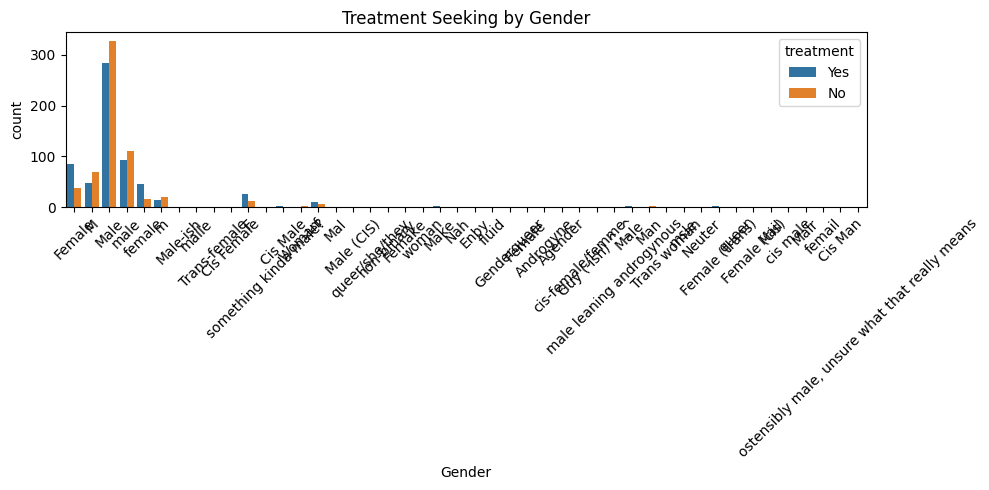

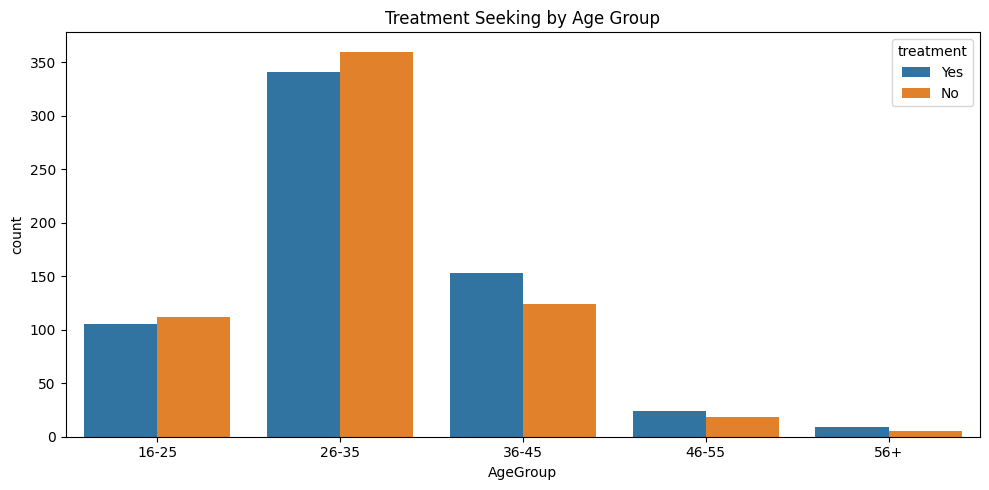

In [2]:
# Visualize Treatment-Seeking by Gender and Age Group
import seaborn as sns
import matplotlib.pyplot as plt

# Convert age to numeric (if needed)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter out unrealistic ages
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]

# Create age groups
bins = [15, 25, 35, 45, 55, 100]
labels = ['16-25', '26-35', '36-45', '46-55', '56+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot treatment by gender
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title("Treatment Seeking by Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot treatment by age group
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='AgeGroup', hue='treatment')
plt.title("Treatment Seeking by Age Group")
plt.tight_layout()
plt.show()


In [4]:
#Handle Missing Values
# Show missing value counts
print(df.isnull().sum())

# Drop columns with too many missing values (optional)
df = df.drop(columns=['comments'], errors='ignore')

# Fill missing values (categorical with mode, numerical with median)
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Confirm no more missing values
print(df.isnull().sum())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
AgeGroup                     0
dtype: int64
Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                     

/tmp/ipython-input-4-3639648599.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-4-3639648599.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [5]:
#Feature Engineer Region Clusters or Age Groups
# Example: Create region clusters (if country/state is available)
if 'state' in df.columns:
    df['RegionCluster'] = df['state'].apply(lambda x: 'West' if x in ['CA', 'WA', 'OR'] else 'Other')

# Age groups already created in Step 2 as 'AgeGroup'
print(df[['Age', 'AgeGroup']].head())


   Age AgeGroup
0   37    36-45
1   44    36-45
2   32    26-35
3   31    26-35
4   31    26-35


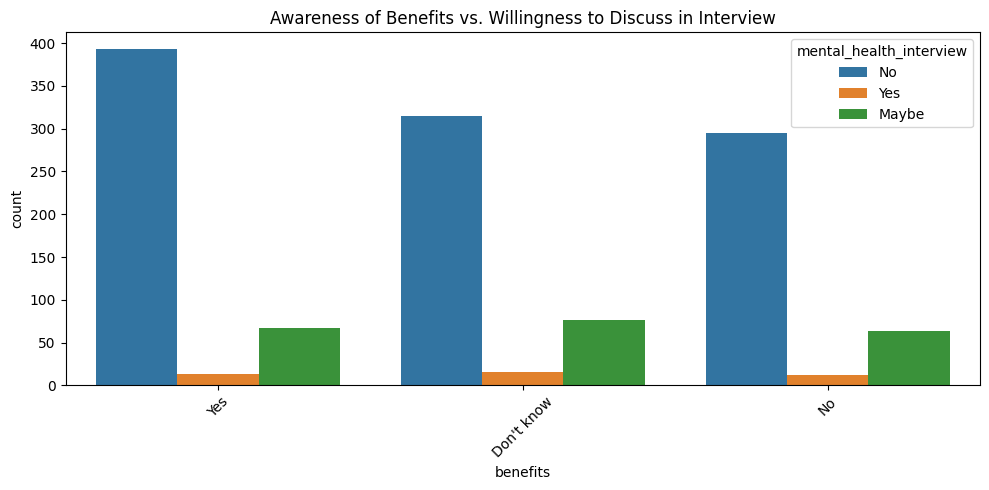

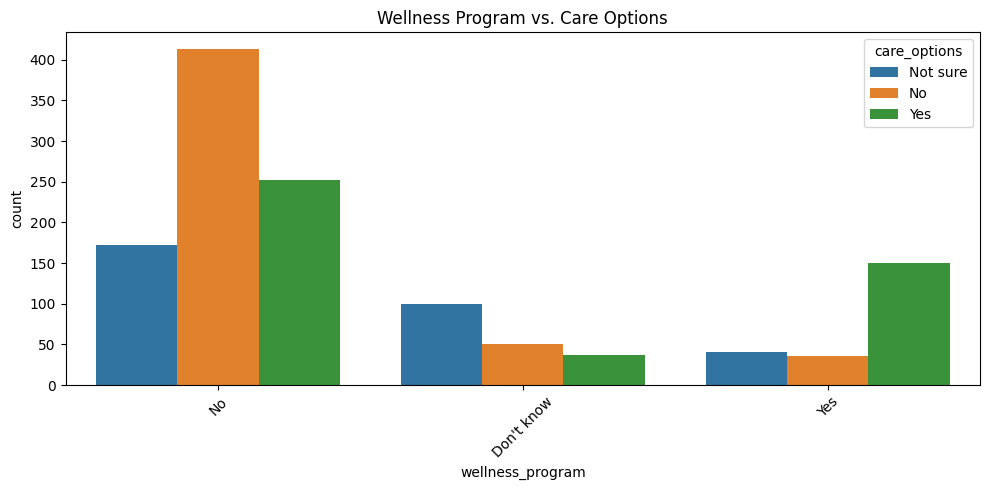

In [6]:
#Visualize Awareness vs. Workplace Support
# Awareness vs mental health benefits
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='benefits', hue='mental_health_interview')
plt.title("Awareness of Benefits vs. Willingness to Discuss in Interview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Awareness vs. wellness programs
if 'wellness_program' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='wellness_program', hue='care_options')
    plt.title("Wellness Program vs. Care Options")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
